# Interpretation and Display of Routes from a given route Data focusing on the adaptability and the normalization of node and path datatypes


suppose that a given algorithm generates a route, displaying it in a human readable format is essential. This requires us to be able to create a program that is able to display as a map out arbitrarily generated route and path while using pre-existing libraries. By this point, deletion, generation and alteration of paths via nodes and graphs are done

suppose we use gen3-2.py, which generates a html map file ready to be embedded and a json file with the routes.

# Code to retrieve the dataset of all OSM street map data

warning this generates a large file

In [ ]:
import requests
import json

# Define the Overpass query to get all streets in Metro Manila, including node IDs
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["name"="Metro Manila"]->.searchArea;
(
  way["highway"](area.searchArea);
);
out body geom qt;
"""

# Fetch data from Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# Prepare the JSON structure for streets in Metro Manila
streets = []

for element in data['elements']:
    # Skip if there are no coordinates for the element
    if 'geometry' not in element:
        continue
    
    coordinates = []
    if 'nodes' not in element:
        continue  # Skip ways without node IDs

    nodes = element['nodes']  # List of node IDs for this way (street)

    if len(nodes) < 2:  # Need at least two nodes to form a road segment
        continue
    
    # Collect coordinates for the way from the node IDs
    for point in element['geometry']:
        coordinates.append([point['lon'], point['lat']])

    street = {
        "start_node": nodes[0],  # The first node in the way
        "end_node": nodes[-1],   # The last node in the way
        "street_name": element.get('tags', {}).get('name', 'Unnamed street'),
        "highway": element.get('tags', {}).get('highway', 'unknown'),
        "length": element.get('tags', {}).get('length', 0),  # Length might not always be available
        "coordinates": coordinates
    }

    streets.append(street)

# Save the result to a JSON file
with open('metro_manila_streets.json', 'w') as outfile:
    json.dump(streets, outfile, indent=4)

print("Metro Manila streets data has been saved to 'metro_manila_streets.json'")

# Gen3-2.py outputs

mapfile

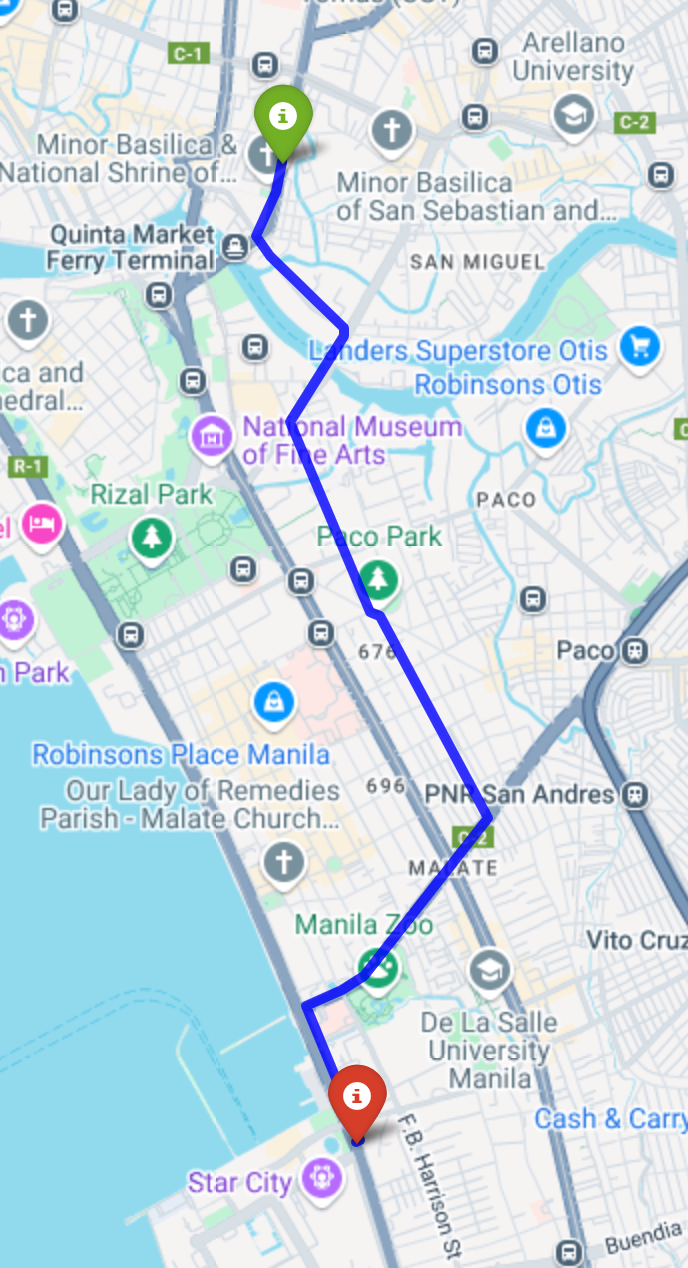

# JSON FILE



In [1]:
import pandas as pd
import json

with open('t307_route_streets_with_ways.json', 'r') as file:
    data = json.load(file)


df = pd.json_normalize(data, record_path=['coordinates'], meta=['way_id', 'street_name', 'highway', 'length'], errors='ignore')


print(df)


            0           1                               way_id  \
0   14.599519  120.984250                             59346512   
1   14.598268  120.984006                             59346512   
2   14.598268  120.984006                             28462755   
3   14.596481  120.983168                             28462755   
4   14.596481  120.983168   [844435274, 1079417221, 676953218]   
..        ...         ...                                  ...   
85  14.559666  120.987401  [1059061387, 1311376589, 657310230]   
86  14.559666  120.987401              [1311376588, 693126654]   
87  14.558921  120.987662              [1311376588, 693126654]   
88  14.558921  120.987662                           1293118595   
89  14.558836  120.987471                           1293118595   

                     street_name       highway   length  
0               Quezon Boulevard       primary  141.531  
1               Quezon Boulevard       primary  141.531  
2                 Unnamed street 

# This of the streets and ways are generated as a byproduct of generating a map from OSM library

thus we should be able to reproduce the map using these data

In [14]:
from IPython.core.display import HTML

html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Route Map</title>
    <link rel="stylesheet" href="https://unpkg.com/leaflet/dist/leaflet.css" />
    <style>
        #map {
            height: 600px;
            width: 100%;
        }
    </style>
</head>
<body>
    <h1>Route Map</h1>
    <div id="map"></div>

    <script src="https://unpkg.com/leaflet/dist/leaflet.js"></script>
    <script>
        // Create map centered at the starting point
        var map = L.map('map').setView([14.5995193, 120.9842498], 13);

        // Add OpenStreetMap tile layer
        L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
            attribution: '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
        }).addTo(map);

        // Define the routes from the given data
        var routes = [
            {
                "coordinates": [
                    [14.5995193, 120.9842498],
                    [14.5982685, 120.9840062]
                ]
            },
            {
                "coordinates": [
                    [14.5982685, 120.9840062],
                    [14.5964807, 120.9831681]
                ]
            },
            {
                "coordinates": [
                    [14.5964807, 120.9831681],
                    [14.5961736, 120.9833833]
                ]
            },
            {
                "coordinates": [
                    [14.5961736, 120.9833833],
                    [14.5960443, 120.9834785]
                ]
            },
            {
                "coordinates": [
                    [14.5960443, 120.9834785],
                    [14.595655, 120.9837587]
                ]
            },
            {
                "coordinates": [
                    [14.595655, 120.9837587],
                    [14.5928492, 120.9865776]
                ]
            },
            {
                "coordinates": [
                    [14.5928492, 120.9865776],
                    [14.5926261, 120.9869211]
                ]
            },
            {
                "coordinates": [
                    [14.5926261, 120.9869211],
                    [14.5922833, 120.9869688]
                ]
            },
            {
                "coordinates": [
                    [14.5922833, 120.9869688],
                    [14.5902398, 120.9856518]
                ]
            },
            {
                "coordinates": [
                    [14.5902398, 120.9856518],
                    [14.5896874, 120.985285]
                ]
            },
            {
                "coordinates": [
                    [14.5896874, 120.985285],
                    [14.5895765, 120.9852028]
                ]
            }
        ];

        // Plot each route on the map
        routes.forEach(function(route) {
            L.polyline(route.coordinates, { color: 'blue', weight: 5 }).addTo(map);
        });

        // Add markers for each coordinate
        routes.forEach(function(route) {
            route.coordinates.forEach(function(coord) {
                L.marker(coord).addTo(map);
            });
        });
    </script>
</body>
</html>
"""

# Display the HTML in the notebook
display(HTML(html_code))


# Since we are able to generate meaningful human readable data from a generated route and its subsequent node/street information, let us find ways to recreate a route/map rom limited or a small amount of data

Most significantly, we must be able to generate a list whether it be a list of streeet names, coordinates and OSM way ID's

In [1]:
import json

def get_way_id_from_street(street_name, json_file="metro_manila_streets.json"):
    with open(json_file, 'r') as file:
        data = json.load(file)
        
        for street in data:
            if street['street_name'].lower() == street_name.lower():
                return street['start_node']  # or street['end_node'], depending on your need
        
    return None

# Example usage
street_name = "Maharlika Street"
way_id = get_way_id_from_street(street_name)
if way_id:
    print(f"Way ID for {street_name}: {way_id}")
else:
    print(f"Street name {street_name} not found.")


Way ID for Maharlika Street: 267


In [2]:
import json

def get_coordinates_from_way_id(way_id, json_file="metro_manila_streets.json"):
    with open(json_file, 'r') as file:
        data = json.load(file)
        
        for street in data:
            if street['start_node'] == way_id or street['end_node'] == way_id:
                return street['coordinates']
        
    return None

# Example usage
way_id = 267  # replace with the actual Way ID
coordinates = get_coordinates_from_way_id(way_id)
if coordinates:
    print(f"Coordinates for Way ID {way_id}: {coordinates}")
else:
    print(f"Way ID {way_id} not found.")


Coordinates for Way ID 267: [[121.0519472, 14.6501156], [121.0520906, 14.6502619], [121.0521301, 14.6502866], [121.0521669, 14.6502959], [121.0524325, 14.6502692], [121.0535739, 14.6501545]]


In [3]:
import json

def get_street_name_from_coordinates(coords, json_file="metro_manila_streets.json"):
    with open(json_file, 'r') as file:
        data = json.load(file)
        
        for street in data:
            for coordinate in street['coordinates']:
                if coordinate == coords:
                    return street['street_name']
        
    return None

# Example usage
coords = [121.0519472, 14.6501156]  # replace with the actual coordinates
street_name = get_street_name_from_coordinates(coords)
if street_name:
    print(f"Street name for coordinates {coords}: {street_name}")
else:
    print(f"Coordinates {coords} not found.")


Street name for coordinates [121.0519472, 14.6501156]: Maharlika Street


# Multiple instances of Street Name

taking a look at the metro_manila_streets.json, you will notice that there are multiple instances of "Quezon Boulevard". While yes the data is consistent as they represent the same street, the differences in the Way Id's, coordinates and children are all points of interests within the street as such it is vital that we combine all three data identification points to get a specific place, however they still represent the same place